# Linear Regression to estimate high-order epistasis

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from epistasis.models import EpistasisNonlinearRegression

# Define the nonlinear relationship and it's inverse.
def diminishing_returns(x, A):
    return 1.0 / (1 + A * np.exp(-x))  

def reverse_func(y, A):
    return -np.log(((1 / y) - 1)/A)

# Initialize the model
model = EpistasisNonlinearRegression.from_json("../data/nonlinear-epistasis-dataset.json",
    order=2,
    function=diminishing_returns,
    reverse=reverse_func,
    model_type="local",
)

# Fit the model.
model.fit(A=1)

EpistasisNonlinearRegression(function=<function diminishing_returns at 0x10cfb52f0>,
               model_type='local', order=2,
               reverse=<function reverse_func at 0x10d3a6b70>)

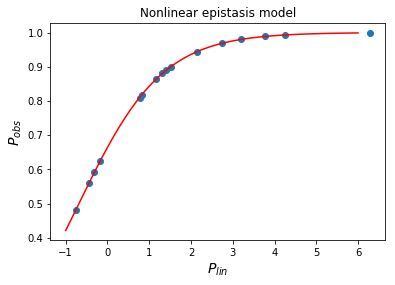

In [84]:
padd = model.Linear.predict(model.Linear.Xfit)
pobs = model.gpm.phenotypes
plt.plot(padd, pobs, "o")

xmodel = np.linspace(-1, 6)
ymodel = model.function(xmodel, model.parameters.A)

plt.plot(xmodel, ymodel, "-r")
plt.xlabel("$P_{lin}$", fontsize=14)
plt.ylabel("$P_{obs}$", fontsize=14)
plt.title("Nonlinear epistasis model")
plt.show()

In [87]:
from epistasis.plot import corr_resid_rhist, coefs

(<matplotlib.figure.Figure at 0x10df37860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10df7f6a0>])

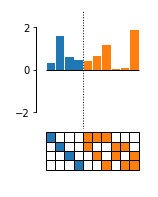

In [93]:
coefs(model.epistasis.values, model.epistasis.sites, figsize=(2,3))